In [22]:
import seaborn as sns
import pandas as pd

titanic = sns.load_dataset('titanic')

titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [21]:
titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace=True)

<ipython-input-21-7fc35df1c408>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace=True)


In [ ]:
titanic['embarked'] = titanic

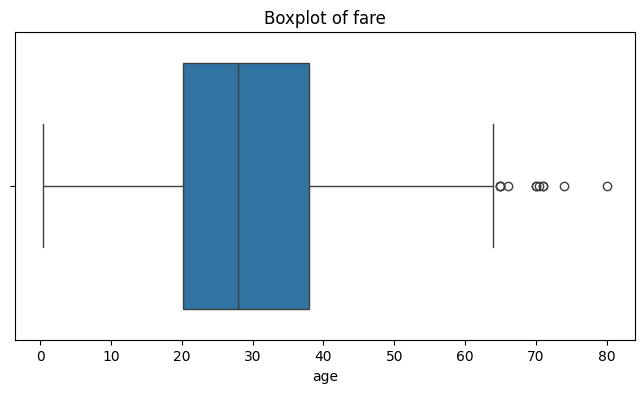

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
sns.boxplot(x=titanic['age'])
plt.title("Boxplot of fare")
plt.show()

In [27]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import PowerTransformer

# Sample DataFrame
data = {'value': [10, 12, 15, 11, 13, 100]}
df = pd.DataFrame(data)

# 1. IQR Method for outlier detection
Q1 = df['value'].quantile(0.25)
Q3 = df['value'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['value'] < lower_bound) | (df['value'] > upper_bound)]
print("Outliers (IQR Method):\n", outliers)

Outliers (IQR Method):
    value
5    100


In [28]:
# 2. Capping (Winsorizing)
df['value_capped'] = np.where(df['value'] < lower_bound, lower_bound, df['value'])
df['value_capped'] = np.where(df['value_capped'] > upper_bound, upper_bound, df['value_capped'])
print("\nDataFrame after capping:\n", df)

# 3. Power Transformation (Yeo-Johnson)
pt = PowerTransformer(method='yeo-johnson')
df['value_transformed'] = pt.fit_transform(df[['value']])  # PowerTransformer expects 2D array
print("\nDataFrame after Yeo-Johnson transformation:\n", df)



DataFrame after capping:
    value  value_capped
0     10        10.000
1     12        12.000
2     15        15.000
3     11        11.000
4     13        13.000
5    100        19.375

DataFrame after Yeo-Johnson transformation:
    value  value_capped  value_transformed
0     10        10.000          -1.205821
1     12        12.000          -0.350466
2     15        15.000           0.400147
3     11        11.000          -0.727102
4     13        13.000          -0.048600
5    100        19.375           1.931842


In [29]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [32]:
titanic_encoded = pd.get_dummies(titanic, columns=['sex', 'embarked'], drop_first=False)
print("\nData Sample after One-Hot Encoding:")
titanic_encoded.head()




Data Sample after One-Hot Encoding:


,survived,pclass,age,sibsp,parch,fare,class,who,adult_male,deck,embark_town,alive,alone,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,0,3,22.0,1,0,7.2500,Third,man,True,NaN,Southampton,no,False,False,True,False,False,True
1,1,1,38.0,1,0,71.2833,First,woman,False,C,Cherbourg,yes,False,True,False,True,False,False
2,1,3,26.0,0,0,7.9250,Third,woman,False,NaN,Southampton,yes,True,True,False,False,False,True
3,1,1,35.0,1,0,53.1000,First,woman,False,C,Southampton,yes,False,True,False,False,False,True
4,0,3,35.0,0,0,8.0500,Third,man,True,NaN,Southampton,no,True,False,True,False,False,True


In [33]:
# Alternatively, using Label Encoding for 'sex'
from sklearn.preprocessing import LabelEncoder

titanic['sex_encoded'] = LabelEncoder().fit_transform(titanic['sex'])
print("\nData Sample with Label Encoded 'sex':")
print(titanic[['sex', 'sex_encoded']].head())



Data Sample with Label Encoded 'sex':
      sex  sex_encoded
0    male            1
1  female            0
2  female            0
3  female            0
4    male            1


In [34]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Create a copy to work on scaling
titanic_scaled = titanic.copy()

# Scaling using StandardScaler for 'age' and 'fare'
scaler = StandardScaler()
titanic_scaled[['age', 'fare']] = scaler.fit_transform(titanic_scaled[['age', 'fare']])
print("\nData Sample after Standard Scaling:")
titanic_scaled[['age', 'fare']].head()



Data Sample after Standard Scaling:


,age,fare
0,-0.530377,-0.502445
1,0.571831,0.786845
2,-0.254825,-0.488854
3,0.365167,0.420730
4,0.365167,-0.486337
